In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

E:\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
E:\Anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
gas = pd.read_csv("gas_turbines.csv")
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gas.shape

(15039, 11)

In [4]:
gas.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [5]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
gas.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TEY'>

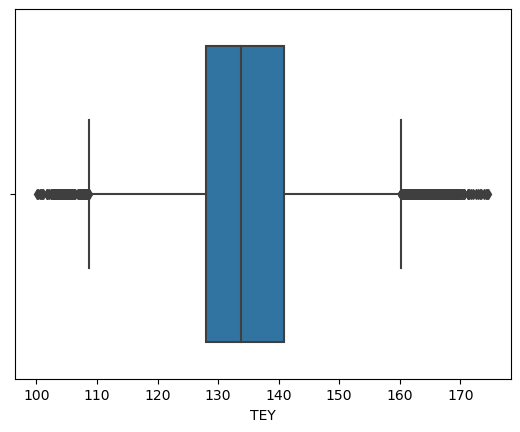

In [9]:
sns.boxplot(gas.TEY)

In [10]:
X = gas.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= gas.loc[:,['TEY']]

In [11]:
scaled = StandardScaler()
X = scaled.fit_transform(X)
y = scaled.fit_transform(y)

In [12]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached grpcio-1.53.0-cp39-cp39-win_amd64.whl (4.0 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached ml_dtypes-0.1.0-cp39-cp39-win_amd64.whl (120 kB)
  Using cached google_auth-2.17.3-py2.py3-none-any.whl (178 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
# import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import KFold

In [14]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [15]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

C:\Users\Admin\AppData\Local\Temp\ipykernel_23184\298964653.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)


Results: -0.08 (0.03) MSE


In [16]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-1.1111165, -1.1337682, -1.1479965, ..., -2.101947 , -1.8463484,
       -1.4363514], dtype=float32)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [19]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)
prediction

array([-0.22763896,  0.39415184,  0.0558991 , ..., -1.0150325 ,
       -0.96920544,  0.15280935], dtype=float32)

In [20]:
X = gas.drop(columns = ['TEY'], axis = 1) 
y = gas.iloc[:,7]

In [21]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [22]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [23]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [25]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 2s - loss: 3161.5735 - mean_squared_error: 3161.5735 - val_loss: 191.4275 - val_mean_squared_error: 191.4275 - 2s/epoch - 6ms/step
Epoch 2/100
381/381 - 1s - loss: 109.8852 - mean_squared_error: 109.8852 - val_loss: 87.6548 - val_mean_squared_error: 87.6548 - 754ms/epoch - 2ms/step
Epoch 3/100
381/381 - 1s - loss: 51.2372 - mean_squared_error: 51.2372 - val_loss: 41.7734 - val_mean_squared_error: 41.7734 - 784ms/epoch - 2ms/step
Epoch 4/100
381/381 - 1s - loss: 25.7383 - mean_squared_error: 25.7383 - val_loss: 20.6130 - val_mean_squared_error: 20.6130 - 809ms/epoch - 2ms/step
Epoch 5/100
381/381 - 1s - loss: 12.5833 - mean_squared_error: 12.5833 - val_loss: 9.2037 - val_mean_squared_error: 9.2037 - 669ms/epoch - 2ms/step
Epoch 6/100
381/381 - 1s - loss: 6.6674 - mean_squared_error: 6.6674 - val_loss: 5.1964 - val_mean_squared_error: 5.1964 - 1s/epoch - 3ms/step
Epoch 7/100
381/381 - 1s - loss: 3.9123 - mean_squared_error: 3.9123 - val_loss: 3.1853 - val_mean_squar

In [26]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 1.3614 - mean_squared_error: 1.3614


In [27]:
predictions = model.predict_on_batch(X_test_scaled)

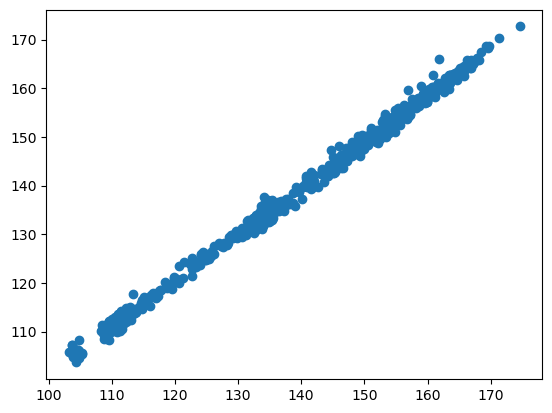

In [28]:
plt.scatter(y_test, predictions)

In [29]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,134.816727,0.265303
1,111.88,113.690559,1.618305
2,133.72,134.499954,0.583274
3,133.79,133.555344,0.175392
4,110.77,111.355614,0.528675
...,...,...,...
1499,132.85,133.083908,0.176069
1500,125.07,125.429085,0.287107
1501,160.95,159.513382,0.892587
1502,133.12,132.457779,0.497462


# By using TensorFlow, Prediction of Turbine Energy Yield (TEY) we can see error is going to decrease it means we got better model